# Imports

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Config of path_name

In [3]:
phase_path = "./Results/Phases_grid_data.csv"
segment_path = "./Results/Segments_grid_data.csv"
storage_path = "./visuals/"

# Data inspection and enchancement calculation

In [4]:
def error_prop_enhance(Focus, BCK,Focus_error, BCK_error):
    return np.sqrt((Focus_error/BCK)**2 + ((Focus*BCK_error)/BCK**2)**2)

In [5]:
phase_df = pd.read_csv(phase_path).drop(columns=["Unnamed: 0"])
segment_df = pd.read_csv(segment_path).drop(columns=["Unnamed: 0"])

In [6]:
phase_df["enchancement"] = phase_df["focus_intensity"] / phase_df["background_intensity"]
phase_df["enchancement_error"] = error_prop_enhance(phase_df["focus_intensity"],phase_df["background_intensity"], phase_df["focus_std"], phase_df["background_std"])
phase_df

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,phase,enchancement,enchancement_error
0,0,2215.297297,13.160739,11.202034,0.009756,453,3,168.326210,0.860269
1,1,2301.648649,13.643859,8.970711,0.010611,357,3,168.694837,0.670452
2,2,2727.081081,13.325479,9.209388,0.010297,320,3,204.651630,0.708973
3,3,2184.540541,13.630567,9.489034,0.010476,357,3,160.267772,0.706973
4,4,2092.189189,13.748401,7.420761,0.010565,453,3,152.176912,0.552277
...,...,...,...,...,...,...,...,...,...
470,20,2240.189189,12.684502,9.265804,0.009494,453,6,176.608372,0.742346
471,21,2092.135135,12.600648,5.414878,0.009506,357,6,166.033935,0.447613
472,22,2116.783784,12.703071,9.195636,0.009978,320,6,166.635591,0.735630
473,23,1842.108108,13.013802,7.155253,0.009863,357,6,141.550341,0.560190


In [7]:
segment_df["enchancement"] = segment_df["focus_intensity"] / segment_df["background_intensity"]
segment_df["enchancement_error"] = error_prop_enhance(segment_df["focus_intensity"],segment_df["background_intensity"], segment_df["focus_std"], segment_df["background_std"])
segment_df

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,segment,enchancement,enchancement_error
0,0,426.378378,15.977421,2.728084,0.012769,453,10,26.686308,0.172073
1,1,528.675676,15.873285,2.721839,0.011969,357,10,33.306002,0.173302
2,2,852.540541,15.708664,3.379047,0.012130,320,10,54.271997,0.219152
3,3,655.972973,15.994989,3.050940,0.012308,357,10,41.011156,0.193336
4,4,480.081081,16.050010,3.936935,0.012795,453,10,29.911574,0.246448
...,...,...,...,...,...,...,...,...,...
720,20,212.270270,17.584311,2.201550,0.014026,453,5,12.071572,0.125569
721,21,128.594595,17.202659,1.313224,0.013275,357,5,7.475274,0.076556
722,22,185.270270,17.087205,2.491079,0.013727,320,5,10.842632,0.146046
723,23,167.270270,17.766264,1.201198,0.014565,357,5,9.415050,0.068050


# Visuals

## Segments

In [30]:
seg_grouped = segment_df.groupby("segment").mean()
segment_array = np.array(seg_grouped.index.values)**2
enhance_array = seg_grouped["enchancement"]
enhance_error_array = seg_grouped["enchancement_error"]

In [29]:
np.array(seg_grouped.index.values)**2

array([ 25, 100, 225, 400, 625, 900], dtype=int64)

In [39]:
def theory_value(N):
    return (4/np.pi) * (N-1) + 1

T_vals = theory_value(segment_array)
T_vals

array([  31.55774907,  127.05071493,  286.20565802,  509.02257835,
        795.50147591, 1145.64235072])

In [40]:
T_part_vals = enhance_array / T_vals
T_part_vals

segment
5     0.351701
10    0.333720
15    0.333313
20    0.341628
25    0.310474
30    0.303807
Name: enchancement, dtype: float64

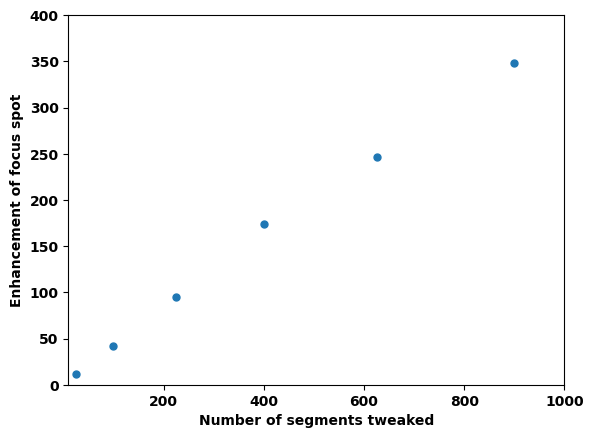

In [36]:
plt.errorbar(segment_array,enhance_array,yerr=enhance_error_array, linestyle = "None", marker = "o", markersize = 5)
plt.xlim(10,1000)
plt.ylim(0,400)
plt.xlabel("Number of segments tweaked")
plt.ylabel("Enhancement of focus spot")
#plt.xscale('log')
plt.savefig(storage_path+"Avg_Enh_segment.jpg")

## Phases

In [17]:
phase_grouped = phase_df.groupby("phase").mean()
phase_array = np.array(phase_grouped.index.values)
enhance_array = phase_grouped["enchancement"]
enhance_error_array = phase_grouped["enchancement_error"]

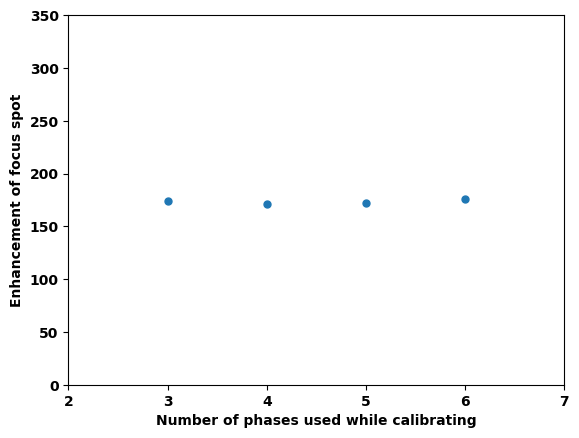

In [19]:
plt.errorbar(phase_array,enhance_array,yerr=enhance_error_array, linestyle = "None", marker = "o", markersize = 5)
plt.xlim(2,7)
plt.ylim(0,350)
plt.xlabel("Number of phases used while calibrating")
plt.ylabel("Enhancement of focus spot")
plt.savefig(storage_path+"Avg_Enh_phase.jpg")

## Centre distance

In [21]:
segment_df.head(5)

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,segment,enchancement,enchancement_error
0,0,426.378378,15.977421,2.728084,0.012769,453,10,26.686308,0.172073
1,1,528.675676,15.873285,2.721839,0.011969,357,10,33.306002,0.173302
2,2,852.540541,15.708664,3.379047,0.012130,320,10,54.271997,0.219152
3,3,655.972973,15.994989,3.050940,0.012308,357,10,41.011156,0.193336
4,4,480.081081,16.050010,3.936935,0.012795,453,10,29.911574,0.246448


In [22]:
dist_df = segment_df[segment_df["segment"] == 30]
dist_df.head(15)

,index,focus_intensity,background_intensity,focus_std,background_std,centre_distance,segment,enchancement,enchancement_error
475,0,2775.783784,10.374698,9.483686,0.007757,453,30,267.553204,0.935747
476,1,3992.567568,9.888985,9.831268,0.007496,357,30,403.738867,1.040203
477,2,4095.000000,9.816245,0.000000,0.007765,320,30,417.165630,0.329998
478,3,4042.972973,9.826385,7.633447,0.007195,357,30,411.440503,0.833210
479,4,3322.108108,10.096509,9.941890,0.007455,453,30,329.035316,1.014217
480,5,3971.243243,9.787817,10.650528,0.007336,357,30,405.733284,1.129830
481,6,3620.108108,9.746318,9.735192,0.008651,226,30,371.433401,1.051867
482,7,1228.729730,11.167854,6.682254,0.012193,160,30,110.023796,0.610285
483,8,3918.216216,9.662009,14.462623,0.008140,226,30,405.528124,1.535353
484,9,2240.432432,10.778792,8.588689,0.008273,357,30,207.855606,0.812629


In [23]:
dist_grouped = dist_df.groupby("centre_distance").mean()
dist_grouped

,index,focus_intensity,background_intensity,focus_std,background_std,segment,enchancement,enchancement_error
centre_distance,,,,,,,,
0,12.0,4089.821622,8.820616,2.384119,0.007544,30.0,463.715195,0.507026
160,12.0,3124.654054,9.792993,10.676577,0.009258,30.0,330.463560,1.163470
226,12.0,3360.889189,9.833455,11.004345,0.008668,30.0,345.726864,1.173963
320,12.0,3817.374324,9.914416,7.256671,0.007733,30.0,384.971246,0.855320
357,12.0,3430.366892,10.156797,10.000325,0.007834,30.0,339.976759,1.021662
453,12.0,3234.417568,10.195984,10.683720,0.007677,30.0,318.295818,1.078619


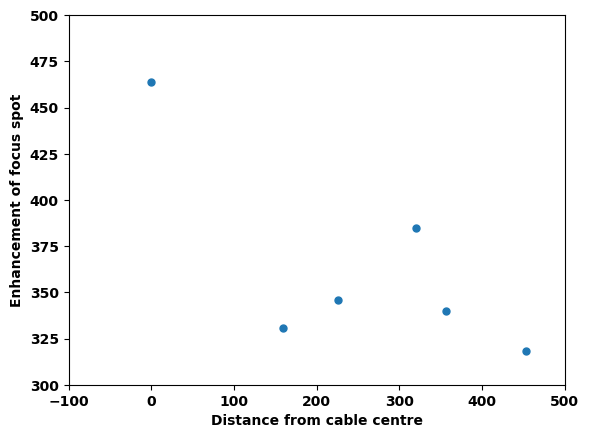

In [27]:
dist_array = np.array(dist_grouped.index.values)
enhance_array = dist_grouped["enchancement"]
enhance_error_array = dist_grouped["enchancement_error"]

plt.errorbar(dist_array,enhance_array,yerr=enhance_error_array, linestyle = "None", marker = "o", markersize = 5)
plt.xlim(-100,500)
plt.ylim(300,500)
plt.xlabel("Distance from cable centre")
plt.ylabel("Enhancement of focus spot")
plt.savefig(storage_path+"Avg_Enh_dist.jpg")